# Save images of molecules

### imports

In [1]:
import time
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import uniform, randint
from rdkit import Chem
from rdkit.Chem import Draw

from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import PredictionErrorDisplay as PED
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,root_mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold,RandomizedSearchCV,GridSearchCV
import pickle
from joblib import dump, load

### data loading

In [ ]:
X=pd.read_pickle("data/processed/calc_descriptors_final.pkl")
print("n_features: ", len(X.columns))

print(X['Ipc'].max(),X['Ipc'].min())
scaler = MinMaxScaler()
X['Ipc'] = scaler.fit_transform(X['Ipc'].values.reshape(-1,1))
print(X['Ipc'].max(),X['Ipc'].min())


scaler=StandardScaler().fit(X)
scaled=scaler.transform(X)

df=pd.read_pickle("data/processed/gap_smile.pkl")
#y=df["GAP"].to_numpy()
#X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)

n_features:  56
219.2769658075064 1.0851048673387407
1.0 0.0


In [5]:
# predictions
load_file='data/processed/reg_NN_MLP.joblib'
reg=load(load_file)
gap_pred=reg.predict(scaled)
df["GAP_P"]=gap_pred

/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
df_concat=pd.concat([df,X],axis=1,join='inner')
df_concat['diff']=df_concat['GAP']-df_concat['GAP_P']
df_concat

/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,GAP,SMILE,GAP_P,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumRadicalElectrons,AvgIpc,...,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine,diff
0,4.218750,CC(=C)C1C2OC(=O)C1C1(O)CC3OC33C(=O)OC2C13C,3.887645,13.421670,1.813652,-4.213449,93.904762,292.287,0,3.203010,...,0,0,0,0,4,2,0,0,0,0.331105
1,1.830078,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,1.460255,14.938999,0.626931,-6.373747,66.444444,660.651,0,3.295038,...,1,2,0,0,0,2,2,0,0,0.369824
2,1.650391,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,1.858951,15.674552,1.517576,-4.913705,45.409091,598.604,0,3.352137,...,0,1,0,0,6,1,2,0,0,-0.208561
3,1.730469,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,1.732663,15.162100,1.184590,-4.773941,45.804878,554.551,0,3.323824,...,0,1,0,0,6,1,2,0,0,-0.002194
4,3.580078,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,3.363940,14.690159,1.393863,-6.473465,57.538462,534.693,0,3.304427,...,0,0,0,0,1,3,0,0,0,0.216138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406198,3.970703,O=C(NCCN=C(O)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F...,3.877003,13.510691,1.513305,-7.333639,19.571429,452.142,0,2.615850,...,0,0,0,0,0,0,0,0,0,0.093700
406199,1.429688,O=C(O)C=CC1=C2NC(C=C3N=C(C=C4NC(=CC5=NC=6C(C(=...,1.545973,15.059651,0.354457,-4.267296,30.500000,588.664,0,4.039629,...,0,5,0,3,8,1,1,0,0,-0.116286
406200,3.130859,O[C]1[CH][C](O)[C]2[CH][C](OC3OC(CO)C(O)C(O)C3...,2.474674,9.735870,0.859880,-5.445191,72.090909,626.564,15,3.337697,...,0,0,0,0,1,0,0,0,0,0.656186
406201,1.839844,O=C(N)C1C(=O)C(N(C)C)C2CC3CC4=C(C(=O)C3C(=O)C2...,1.500383,15.164901,0.812307,-5.526028,60.818182,457.483,0,3.064037,...,1,0,1,0,3,0,4,0,0,0.339461


### show in notebook

In [7]:
outlier_small=df_concat["diff"].nsmallest(4)
outlier_large=df_concat["diff"].nlargest(4)
combined = pd.concat([outlier_small, outlier_large])
combined_df = df_concat.loc[combined.index, ['SMILE', 'diff','GAP','GAP_P']]
combined_df

/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,SMILE,diff,GAP,GAP_P
289832,O=CC(O)C(O)C(OC1OC(CO)C(OC2OC(CO)C(OC3OC(CO)C(...,-3.800105,2.080078,5.880183
2493,O=NOS(=O)(=O)O,-3.580562,2.199219,5.779781
16839,O=CC(O)C(O)C(O)C[As](=O)(C)C,-3.454595,3.019531,6.474126
21820,O=NC(C)(C)C,-3.330509,1.059570,4.390080
125459,O=C(O)CC(NC(=N)N)C(=O)O,5.843800,9.562500,3.718700
117130,N1CCCC2CC3CC(CN4CCCCC43)(C5NC(CCC5)C6CCC7NC6C8...,5.062006,8.757812,3.695807
67299,N1CCCC2CC3CC(CN4CCCCC43)(C5NC(CCC5)C6CCC7NC6N8...,4.877327,8.406250,3.528923
127010,N1C2N3CCCC4CC5CC(CN6CCCCC65)(C7NC(N8CCCC9CC%10...,4.778311,8.179688,3.401376


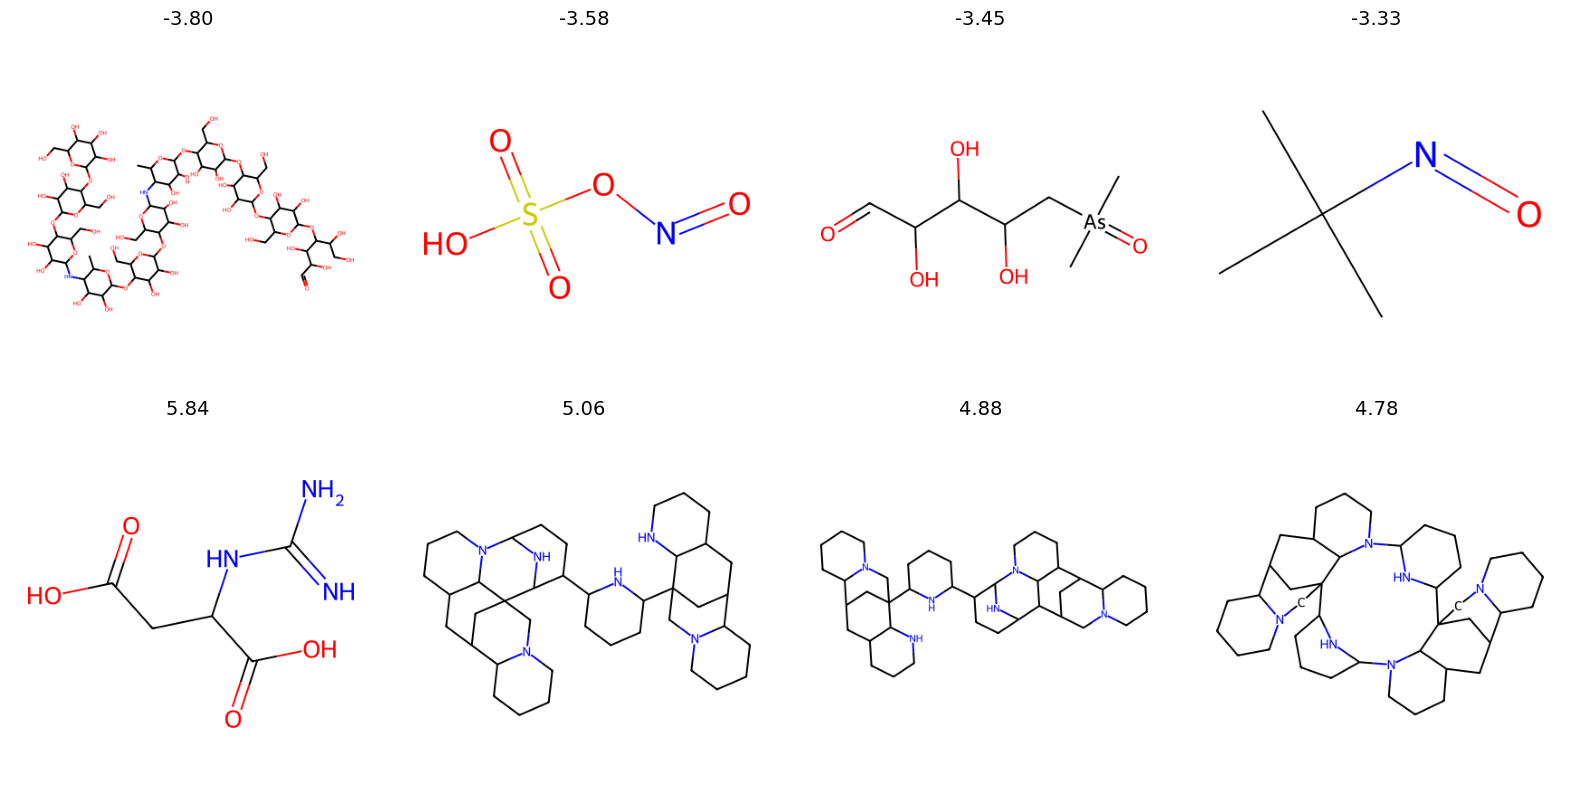

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
molecules = [Chem.MolFromSmiles(smile) for smile in combined_df['SMILE']]
axes = axes.flatten()
for i, (mol, diff_value) in enumerate(zip(molecules, combined_df["diff"])): #, gap_value,combined_df["GAP"]
    if mol:  # Ensure the molecule is valid
        img = Draw.MolToImage(mol, size=(400, 400))
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"{diff_value:.2f} ", fontsize=14) #\n {gap_value:.2f}

# Adjust layout
plt.tight_layout()
plt.show()


### bulk saving as pdf

In [ ]:
#Define constants
num_mols = len(df_frag_04)
cols = 4  # Number of molecules per row
rows_per_page = 10  # Adjust this to fit a reasonable figure size
molecules_per_page = cols * rows_per_page
total_pages = math.ceil(num_mols / molecules_per_page)

# Create multi-page PDF
with PdfPages("outliers_smaller_-08eV_larger_08eV.pdf") as pdf:
    for page in range(total_pages):
        fig, axes = plt.subplots(rows_per_page, cols, figsize=(16, rows_per_page * 4))

        # Flatten axes for easier indexing
        axes = axes.flatten()

        for i in range(molecules_per_page):
            idx = page * molecules_per_page + i
            if idx >= num_mols:
                fig.delaxes(axes[i])  # Remove extra empty subplots
                continue
            
            mol = Chem.MolFromSmiles(df_frag_04["SMILE"].iloc[idx])
            diff_value = df_frag_04["diff"].iloc[idx]

            if mol:
                img = Draw.MolToImage(mol, size=(400, 400))
                axes[i].imshow(img)
                axes[i].axis("off")
                axes[i].set_title(f"{diff_value:.2f}", fontsize=14)

        plt.tight_layout()
        pdf.savefig(fig)  # Save current figure as a new page in the PDF
        plt.close(fig)  # Close the figure to free memory